In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
n = 196591

In [3]:
clusters = pd.read_csv('exemplars.txt', sep = '\n', header = None, names = ['exemplar'])
clusters["user"] = pd.Series(range(n))

In [4]:
clusters_sizes = clusters['exemplar'].value_counts()
print('Number of clusters:', clusters_sizes.count())

Number of clusters: 117581


In [5]:
print('Number of clusters of size > 1:', np.sum(clusters_sizes > 1))

Number of clusters of size > 1: 44150


In [6]:
print('Number of clusters of size > 100:', np.sum(clusters_sizes > 100))

Number of clusters of size > 100: 17


In [7]:
count_sizes = clusters_sizes.value_counts().sort_index()
count_sizes[:10]

1     73431
2     29280
3      9844
4      3068
5       987
6       412
7       177
8        99
9        60
10       36
Name: exemplar, dtype: int64

In [8]:
count_sizes[-10:]

277     1
347     1
369     1
457     1
615     1
642     1
790     1
1035    1
1093    1
2394    1
Name: exemplar, dtype: int64

Text(0.5, 0, 'Размеры кластеров')

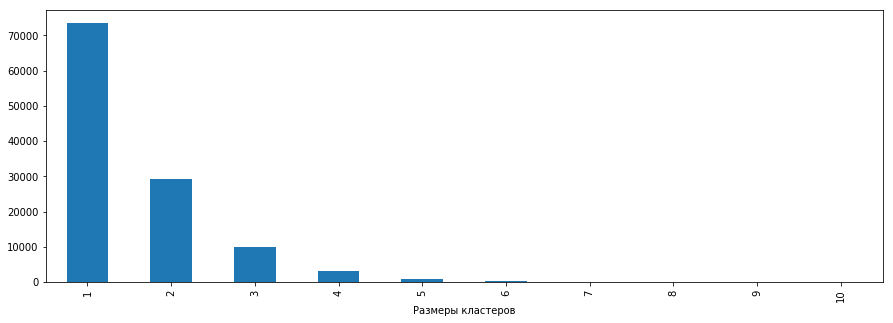

In [9]:
ax = count_sizes[count_sizes.index <= 10].plot(kind = "bar", figsize = (15, 5))
ax.set_xlabel("Размеры кластеров")

Text(0.5, 0, 'Размеры кластеров')

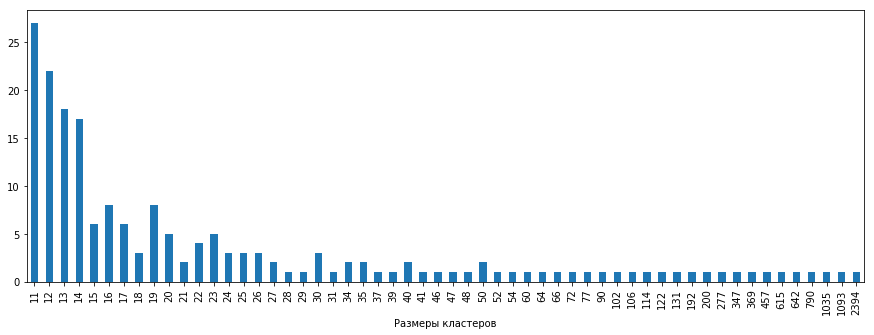

In [10]:
ax = count_sizes[count_sizes.index > 10].plot(kind = "bar", figsize = (15, 5))
ax.set_xlabel("Размеры кластеров")

In [11]:
checkins = pd.read_csv('Gowalla_totalCheckins.txt', sep = '\t', header = None)
checkins = checkins[[0, 4]]
checkins.columns = ['user', 'location']
users = np.unique(checkins['user'])

In [12]:
data = pd.merge(checkins, clusters, left_on = ['user'], right_on = ['user'])

In [13]:
def get_top_checkins(x):
    top = x['location'].value_counts().iloc[:10].index.values
    return pd.Series(top)

In [14]:
users_train, users_test = train_test_split(users)
data_train = data[np.isin(data['user'], users_train)]
data_test = data[np.isin(data['user'], users_test)]

In [15]:
top10 = data_train.groupby('exemplar').apply(get_top_checkins)
train_exemplars = data_train['exemplar'].unique()

In [16]:
top10[:20]

exemplar   
0         0    420315
          1     21714
          2     42732
          3     34055
          4     33793
          5     19542
          6      9410
          7      9191
          8     17208
          9     24650
1         0    298129
          1     63805
          2    689928
          3    202016
          4     53626
          5     25678
          6    393164
          7      9961
          8     77910
          9    496456
dtype: int64

In [17]:
# Рекомендуем топ 10 мест из его кластера

countCorrect = 0
total = 0

for user in users_test:
    exemplar = clusters.loc[user]['exemplar']
    if exemplar in train_exemplars:
        top_locations = top10.loc[exemplar].values
        users_locations = data_test[data_test['user'] == user]['location']
        correctAnswers = np.isin(top_locations, users_locations)
        countCorrect += np.sum(correctAnswers)
        total += min(10, users_locations.shape[0])
    else:
        total += 10
print(countCorrect / total * 100)

1.5743402668728208


In [18]:
overall_top = data_train['location'].value_counts().iloc[:10].index.values

In [19]:
# Всем рекомендуем общий топ 10 мест

countCorrect = 0
total = 0

for user in users_test:
    users_locations = data_test[data_test['user'] == user]['location']
    correctAnswers = np.isin(overall_top, users_locations)
    countCorrect += np.sum(correctAnswers)
    total += min(10, users_locations.shape[0])
print(countCorrect / total * 100)

2.2335820208160633
